# AI GO competition
## 2023/9/22

## PART 1. Data Observation

### Prepare the environment and import all library we need

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import opencc
import os
from matplotlib.font_manager import FontManager
from pyplotz.pyplotz import PyplotZ
from sklearn.preprocessing import LabelEncoder
opencc = opencc.OpenCC('t2s')
sns.set_theme(color_codes=True)
font_manager = FontManager()
font = font_manager.findfont('DejaVu Sans')

### function area


In [383]:
def count_unique_values_for_object_columns(df):
  """Counts the number of unique values in all object columns in a Pandas DataFrame.
  Args:
    df: A Pandas DataFrame.
  Returns:
    A dictionary mapping column names to the number of unique values in each column.
  """
  unique_values_counts = {}
  for column in df.select_dtypes(include=['object']):
    unique_values_counts[column] = df[column].nunique()
  return unique_values_counts

def convert_traditional_chinese_df_to_simplified_chinese_df(df):
  """Converts a traditional Chinese Pandas DataFrame to a simplified Chinese Pandas DataFrame in object dtype.
  Args:
    df: A Pandas DataFrame containing traditional Chinese text.
  Returns:
    A Pandas DataFrame containing simplified Chinese text and object dtype.
  """
  # Create a new Pandas DataFrame to store the simplified Chinese data.
  df_simplified = pd.DataFrame()
  # Iterate over the rows of the original DataFrame and convert the traditional Chinese text to simplified Chinese text using the `opencc` library.
  for index, row in df.iterrows():
    for column_name in df.columns:
      if pd.api.types.is_object_dtype(row[column_name]):
        simplified_text = opencc.convert(row[column_name])
        df_simplified.loc[index, column_name] = simplified_text
      else:
        df_simplified.loc[index, column_name] = row[column_name]
  # Change the dtype of all columns in the simplified Chinese DataFrame to object.
  df_simplified = df_simplified.astype('object')
  # Return the simplified Chinese DataFrame.
  return df_simplified


def plot_bar_chart_for_specific_column(df, column_name):
  pltz = PyplotZ()
  pltz.enable_chinese()
  value_counts = df[column_name].value_counts()
  value_counts.plot(kind='bar', color='skyblue')
  pltz.title(f'Count of Values in Column: {column_name}', fontsize=15)
  pltz.xlabel('Values', fontsize=12)
  pltz.ylabel('Count', fontsize=12)
  pltz.xticks(fontproperties=font)
  pltz.yticks(fontproperties=font)
  pltz.show()


### data loading

In [384]:
# Read the CSV file into a Pandas DataFrame
public_dataset_df = pd.read_csv('data/public_dataset.csv',encoding='utf-8-sig')
public_submission_template_df = pd.read_csv('data/public_submission_template.csv',encoding='utf-8-sig')
training_data_df = pd.read_csv('data/training_data.csv',encoding='utf-8-sig')
postcode_data_df = pd.read_csv('data/external_data/postcode.csv',encoding='utf-8-sig')


### observing data

In [385]:
# training_data_df
print("training_data_df_df:")
#print(training_data_df.info())
print("================================")
print(count_unique_values_for_object_columns(training_data_df))
#print("================================")
#print(training_data_df.head(3))
#print("================================")
print(training_data_df.isnull().sum())
print("================================")
#plot_bar_chart_for_specific_column(training_data_df, '縣市')
#print("================================")
#simplified_chinese_training_data_df = convert_traditional_chinese_df_to_simplified_chinese_df(training_data_df)
#print(simplified_chinese_training_data_df.head(5))

training_data_df_df:
{'ID': 11751, '縣市': 18, '鄉鎮市區': 123, '路名': 3059, '使用分區': 5, '主要用途': 12, '主要建材': 6, '建物型態': 4, '備註': 87}
ID            0
縣市            0
鄉鎮市區          0
路名            0
土地面積          0
使用分區      11156
移轉層次          0
總樓層數          0
主要用途          0
主要建材          0
建物型態          0
屋齡            0
建物面積          0
車位面積          0
車位個數          0
橫坐標           0
縱坐標           0
備註        11659
主建物面積         0
陽台面積          0
附屬建物面積        0
單價            0
dtype: int64


public_dataset_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5876 non-null   object 
 1   縣市      5876 non-null   object 
 2   鄉鎮市區    5876 non-null   object 
 3   路名      5876 non-null   object 
 4   土地面積    5876 non-null   float64
 5   使用分區    290 non-null    object 
 6   移轉層次    5876 non-null   int64  
 7   總樓層數    5876 non-null   int64  
 8   主要用途    5876 non-null   object 
 9   主要建材    5876 non-null   object 
 10  建物型態    5876 non-null   object 
 11  屋齡      5876 non-null   float64
 12  建物面積    5876 non-null   float64
 13  車位面積    5876 non-null   float64
 14  車位個數    5876 non-null   float64
 15  橫坐標     5876 non-null   int64  
 16  縱坐標     5876 non-null   int64  
 17  備註      48 non-null     object 
 18  主建物面積   5876 non-null   float64
 19  陽台面積    5876 non-null   float64
 20  附屬建物面積  5876 non-null   float64
dtypes: float64(8), int

c:\Users\lynn9106\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lynn9106\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32291 (\N{CJK UNIFIED IDEOGRAPH-7E23}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lynn9106\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34349 (\N{CJK UNIFIED IDEOGRAPH-862D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lynn9106\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38272 (\N{CJK UNIFIED IDEOGRAPH-9580}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lynn9106\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32681 (\N{CJK UNIFIED IDEOGR

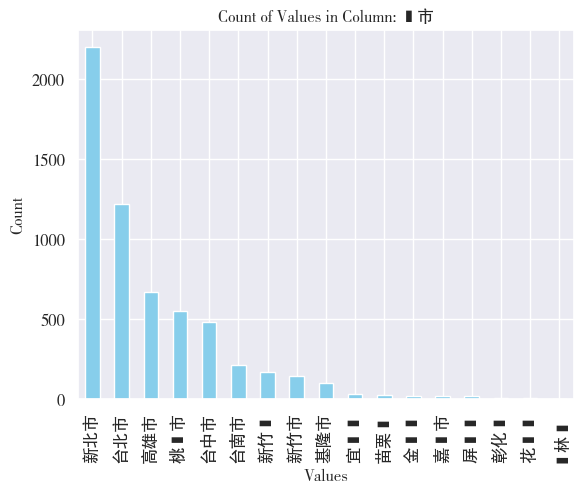

In [386]:
# public_dataset_df
print("public_dataset_df:")
print(public_dataset_df.info())
print("================================")
print(count_unique_values_for_object_columns(public_dataset_df))
print("================================")
print(public_dataset_df.head(3))
print("================================")
print(public_dataset_df.isnull().sum())
print("================================")
plot_bar_chart_for_specific_column(public_dataset_df, '縣市')




In [387]:
# public_submission_template_df
print(public_submission_template_df.info())
print("================================")
print(public_submission_template_df.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5876 non-null   object 
 1   predicted_price  5876 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.9+ KB
None
     ID  predicted_price
0  PU-1              0.0
1  PU-2              0.0
2  PU-3              0.0


### data process

In [388]:
# function area
def add_postcode_data(data_df, postcode_df):
    for i in range(len(data_df)):
        city = data_df.loc[i, "縣市"]
        district = data_df.loc[i, "鄉鎮市區"]
        matching_postcode_df = postcode_df[(postcode_df["縣市"] == city) & (postcode_df["鄉鎮市區"] == district)]
        postcode = int(matching_postcode_df["郵遞區號"])
        data_df.loc[i, "郵遞區號"] = postcode
    return data_df

In [389]:
# training data process
print(count_unique_values_for_object_columns(training_data_df))
training_data_df.insert(4, '郵遞區號', None)
add_postcode_data(training_data_df, postcode_data_df)
print(training_data_df.head(5))
labelencoder = LabelEncoder()
training_data_df["使用分區"] = labelencoder.fit_transform(training_data_df["使用分區"])
training_data_df["主要用途"] = labelencoder.fit_transform(training_data_df["主要用途"])
training_data_df["主要建材"] = labelencoder.fit_transform(training_data_df["主要建材"])
training_data_df["建物型態"] = labelencoder.fit_transform(training_data_df["建物型態"])
print(training_data_df.head(5))
if os.path.exists("./data/new_training_data.csv"):
  print("new_training_data exists.")
else:
  training_data_df.to_csv("./data/new_training_data.csv")
# change first column of new_training_data.csv to N

{'ID': 11751, '縣市': 18, '鄉鎮市區': 123, '路名': 3059, '使用分區': 5, '主要用途': 12, '主要建材': 6, '建物型態': 4, '備註': 87}


C:\Users\lynn9106\AppData\Local\Temp\ipykernel_11624\3932344480.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  postcode = int(matching_postcode_df["郵遞區號"])


     ID   縣市 鄉鎮市區      路名 郵遞區號      土地面積 使用分區  移轉層次  總樓層數  主要用途  ...  \
0  TR-1  台北市  大安區  敦化南路二段  106 -0.256716  NaN    11    11   住家用  ...   
1  TR-2  台北市  萬華區     水源路  108  0.100134  NaN     7    12   住家用  ...   
2  TR-3  高雄市  鳳山區     北忠街  830  0.181921  NaN    10    15  集合住宅  ...   
3  TR-4  新北市  新莊區     福前街  242  0.085594  NaN     9    14  集合住宅  ...   
4  TR-5  新北市  板橋區   文化路一段  220 -0.938116  NaN    41    43   住家用  ...   

       建物面積      車位面積  車位個數     橫坐標      縱坐標   備註     主建物面積      陽台面積  \
0 -0.174154 -0.819326   0.0  305266  2768378  NaN  0.393926  0.183700   
1  0.314204 -0.819326   0.0  300677  2767990  NaN -0.316131  0.608577   
2  0.423366  0.161624   1.0  184815  2504666  NaN -0.098871 -0.360620   
3  0.164249  0.524653   1.0  296653  2772355  NaN -0.071147  0.315088   
4  0.985839  0.532377   1.0  297377  2768472  NaN  0.791954  1.719400   

     附屬建物面積        單價  
0 -0.438452  4.627714  
1 -0.438452  1.887258  
2  1.525881  1.489072  
3  0.231984  2.051217  
4 -0.438

In [390]:
# public dataset process
print(count_unique_values_for_object_columns(public_dataset_df))
public_dataset_df.insert(4, '郵遞區號', None)
add_postcode_data(public_dataset_df, postcode_data_df)
print(public_dataset_df.head(5))
labelencoder = LabelEncoder()
public_dataset_df["使用分區"] = labelencoder.fit_transform(public_dataset_df["使用分區"])
public_dataset_df["主要用途"] = labelencoder.fit_transform(public_dataset_df["主要用途"])
public_dataset_df["主要建材"] = labelencoder.fit_transform(public_dataset_df["主要建材"])
public_dataset_df["建物型態"] = labelencoder.fit_transform(public_dataset_df["建物型態"])
print(public_dataset_df.head(5))
if os.path.exists("./data/new_public_dataset.csv"):
  print("new_public_dataset exists.")
else:
  public_dataset_df.to_csv("./data/new_public_dataset.csv")
# change first column of new_public_dataset.csv to N

{'ID': 5876, '縣市': 17, '鄉鎮市區': 117, '路名': 2266, '使用分區': 5, '主要用途': 11, '主要建材': 6, '建物型態': 4, '備註': 48}


C:\Users\lynn9106\AppData\Local\Temp\ipykernel_11624\3932344480.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  postcode = int(matching_postcode_df["郵遞區號"])


     ID   縣市 鄉鎮市區      路名 郵遞區號      土地面積 使用分區  移轉層次  總樓層數  主要用途  ...  \
0  PU-1  新北市  樹林區     大有路  238  2.039378  NaN     3     7   住家用  ...   
1  PU-2  新北市  三重區   力行路一段  241 -0.077786  NaN     5     5   住家用  ...   
2  PU-3  新北市  板橋區   民生路三段  220 -0.555766  NaN     2    20  集合住宅  ...   
3  PU-4  新北市  泰山區   明志路二段  243 -0.744838  NaN     6    16   住家用  ...   
4  PU-5  台北市  信義區  忠孝東路五段  110 -0.610923  NaN     3     7   住家用  ...   

          屋齡      建物面積      車位面積  車位個數     橫坐標      縱坐標   備註     主建物面積  \
0  13.916667  0.472202  0.146176   1.0  288745  2760266  NaN  0.849664   
1  40.833333 -0.546455 -0.819326   0.0  298751  2773492  NaN -0.004102   
2   1.333333  0.124032 -0.167419   1.0  297000  2769106  NaN -0.285862   
3  27.500000 -0.027072  0.115280   1.0  293076  2771160  NaN  0.027582   
4  40.500000 -0.863600 -0.819326   0.0  308103  2770220  NaN -0.883328   

       陽台面積    附屬建物面積  
0  0.146161 -0.438452  
1  0.064257 -0.438452  
2 -0.775260  1.323042  
3  0.316794 -0.139532  
4 

## PART 2. Data Process

### Prepare the environment and import all library we need

In [273]:
import torch
from scipy import stats
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score
import joblib # save model
print(
    # 確認 torch 的版本
    f'PyTorch version {torch.__version__}\n' +
    # 確認是否有 GPU 裝置
    f'GPU-enabled installation? {torch.cuda.is_available()}\n'
    # 確認GPU 0裝置名字
    f'GPU-device name? {torch.cuda.get_device_name(0)}\n'
    # 確認GPU 1裝置名字
   # f'GPU-device name? {torch.cuda.get_device_name(1)}\n'
)
#os.environ["CUDA_VISIBLE_DEVICES"] = "1,0" # 更改預設gpu為1
pd.options.mode.chained_assignment = None # 關閉copywarning

PyTorch version 2.0.1
GPU-enabled installation? True
GPU-device name? NVIDIA GeForce GTX 1660 Ti with Max-Q Design



### data loading

In [478]:
public_dataset_df = pd.read_csv('data/new_public_dataset.csv',encoding='utf-8-sig')
public_submission_template_df = pd.read_csv('data/public_submission_template.csv',encoding='utf-8-sig')
training_data_df = pd.read_csv('data/new_training_data.csv',encoding='utf-8-sig')

### training data process

In [479]:
training_data_df = training_data_df.drop(['ID'],axis=1)
training_data_df = training_data_df.drop(['N'],axis=1)
training_data_df = training_data_df.drop(['鄉鎮市區'], axis=1)
training_data_df = training_data_df.drop(['路名'], axis=1)
training_data_df = training_data_df.drop(['縣市'], axis=1)
training_data_df = training_data_df.drop(['備註'], axis=1)
print(training_data_df.describe())
#print("================================")
#print(training_data_df.info())
#print("================================")
#print(count_unique_values_for_object_columns(training_data_df))
#print("================================")
#print(training_data_df.isnull().sum())
print("Number of Samples Before removing outliers:")
print(training_data_df.shape[0])
training_data_df = training_data_df[(np.abs(stats.zscore(training_data_df['單價'])) < 4)]
print("Number of Samples After removing outliers:")
print(training_data_df.shape[0])


               郵遞區號          土地面積          使用分區          移轉層次          總樓層數  \
count  11751.000000  11751.000000  11751.000000  11751.000000  11751.000000   
mean     327.770488      0.018416      4.789720      7.433665     12.602672   
std      220.742155      1.072279      0.943754      5.089029      6.840007   
min      100.000000     -1.619755      0.000000      2.000000      2.000000   
25%      220.000000     -0.646264      5.000000      4.000000      7.000000   
50%      242.000000     -0.149839      5.000000      6.000000     12.000000   
75%      401.000000      0.410167      5.000000     10.000000     15.000000   
max      973.000000     19.475175      5.000000     46.000000     68.000000   

               主要用途          主要建材          建物型態            屋齡          建物面積  \
count  11751.000000  11751.000000  11751.000000  11751.000000  11751.000000   
mean       4.197515      3.921028      0.576717     21.319058      0.030517   
std        3.744824      0.648449      0.784563    

### public data process

In [480]:
public_dataset_df = public_dataset_df.drop(['ID'],axis=1)
public_dataset_df = public_dataset_df.drop(['N'],axis=1)
public_dataset_df = public_dataset_df.drop(['鄉鎮市區'], axis=1)
public_dataset_df = public_dataset_df.drop(['路名'], axis=1)
public_dataset_df = public_dataset_df.drop(['縣市'], axis=1)
public_dataset_df = public_dataset_df.drop(['備註'], axis=1)


print(public_dataset_df.describe())

              郵遞區號         土地面積         使用分區         移轉層次         總樓層數  \
count  5876.000000  5876.000000  5876.000000  5876.000000  5876.000000   
mean    325.486726    -0.002864     4.795779     7.238257    12.245745   
std     220.499107     0.932048     0.934168     4.839913     6.460580   
min     100.000000    -1.699811     0.000000     2.000000     2.000000   
25%     220.000000    -0.639499     5.000000     4.000000     7.000000   
50%     242.000000    -0.157686     5.000000     6.000000    12.000000   
75%     350.000000     0.423788     5.000000    10.000000    15.000000   
max     973.000000     6.753225     5.000000    36.000000    42.000000   

              主要用途         主要建材         建物型態           屋齡         建物面積  \
count  5876.000000  5876.000000  5876.000000  5876.000000  5876.000000   
mean      3.970218     3.921545     0.585602    21.376546    -0.025328   
std       3.335427     0.633374     0.782787    14.369584     0.920109   
min       0.000000     0.000000     0

### Skewed features



In [481]:
from scipy.stats import skew
ntrain = training_data_df.shape[0]
ntest = public_dataset_df.shape[0]

all_data = pd.concat((training_data_df, public_dataset_df)).reset_index(drop=True)
all_data = all_data.drop('單價', axis=1)
data_price = training_data_df['單價']

numeric_feats = all_data.dtypes[( all_data.dtypes != "object") & ( all_data.columns != "郵遞區號")].index

# Check the skew of all numerical features
skewed_feats =  all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
附屬建物面積,10.667727
土地面積,3.110549
建物面積,2.372645
主建物面積,2.232193
陽台面積,1.935405
車位面積,1.462723
移轉層次,1.425657
主要用途,1.217670
總樓層數,0.940187
建物型態,0.895284


In [482]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
     all_data[feat] += 1
     all_data[feat] = boxcox1p(all_data[feat], lam)

#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 16 skewed numerical features to Box Cox transform


In [483]:
training_data_df = all_data[:ntrain]
public_dataset_df = all_data[ntrain:]

## Cross Validation

In [484]:
from sklearn.model_selection import KFold, cross_val_score

# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

## Load Data

In [485]:
#X = training_data_df.drop('單價', axis=1)
#y = training_data_df['單價']
X = training_data_df
y = data_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Set Up Model

In [486]:
# function area
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(y, y_pred):
    return np.exp(np.sqrt(np.mean((y - y_pred) ** 2)))


In [641]:
# Light Gradient Boosting Regressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Light Gradient Boosting

LIGHTGBM = LGBMRegressor(objective='regression',
                       learning_rate=0.08,
                       n_estimators=9500,
                       num_leaves=8,
                       min_data_in_leaf = 15,
                       feature_fraction=0.5,
                       feature_fraction_seed=12,
                       bagging_fraction=1,
                       bagging_freq = 4,
                       max_bin=300,
                       bagging_seed= 8,
                       min_sum_hessian_in_leaf = 17,
                       verbose=-1,
                       random_state=42)

#XGB = xgb.XGBRegressor(n_estimators = 100, max_depth=8, learning_rate=0.1, subsample=0.5)

# XGBoost Regressor
XGB = xgb.XGBRegressor(learning_rate=0.1,
                       n_estimators=100,
                       max_depth=8,
                       subsample=0.8,
                       gamma=0.01,
                       seed=47,
                       reg_alpha=0.00007,
                       random_state=42)



'''
# Random Forest Regressor
RF = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)



# Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)
'''

"\n# Random Forest Regressor\nRF = RandomForestRegressor(n_estimators=1200,\n                          max_depth=15,\n                          min_samples_split=5,\n                          min_samples_leaf=5,\n                          max_features=None,\n                          oob_score=True,\n                          random_state=42)\n\n\n\n# Gradient Boosting Regressor\nGBR = GradientBoostingRegressor(n_estimators=6000,\n                                learning_rate=0.01,\n                                max_depth=4,\n                                max_features='sqrt',\n                                min_samples_leaf=15,\n                                min_samples_split=10,\n                                loss='huber',\n                                random_state=42)\n"

In [642]:
lightgbm_model = LIGHTGBM.fit(X_train,y_train)
xgb_model = XGB.fit(X_train, y_train)

#gbr_model = GBR.fit(X_train, y_train)
#rf_model = RF.fit(X_train, y_train)

lightgbm_pred = lightgbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
#gbr_pred = gbr_model.predict(X_test)
#rf_pred = RF_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=17, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=17
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [643]:
def PrintPred(model_pred):
    model_rmse = rmse(y_test, model_pred)
    model_mape = mean_absolute_percentage_error(y_test, model_pred)
    model_r2 = r2_score(y_test, model_pred)
    print("rmse:", model_rmse)
    print("mape:", model_mape)
    print("R2 Score:", model_r2)
    plt.figure(figsize=(8,5))
    plt.scatter(y_test,model_pred)
    plt.xlabel("target value") #x label
    plt.ylabel("predictvalue") #y label
    plt.show()

rmse: 1.2739542357539442
mape: 9.572133099765553
R2 Score: 0.924038350693453


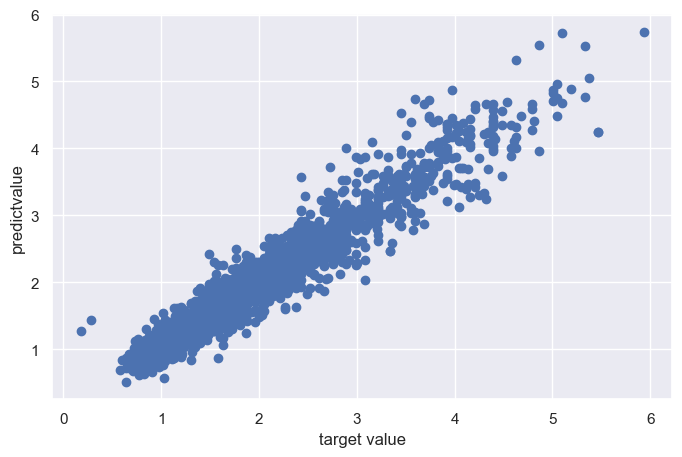

rmse: 1.2764366010693053
mape: 9.700580617194717
R2 Score: 0.9228119990144952


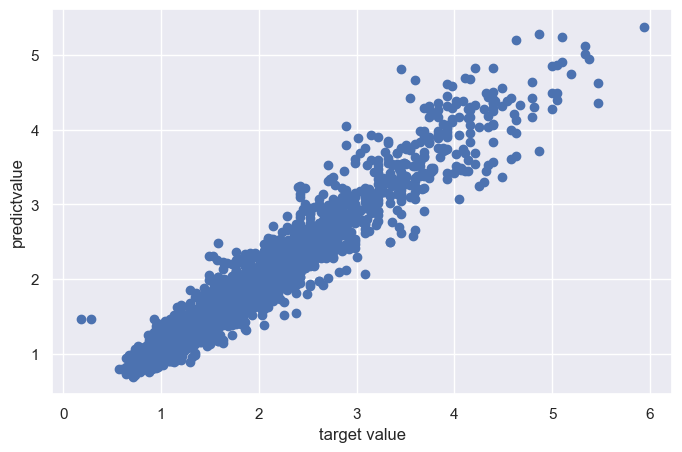

In [644]:
PrintPred(lightgbm_pred)
#PrintPred(xgb_pred)
PrintPred(xgb_pred)

## Blend Model


In [665]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.57 * lightgbm_model.predict(X)) + \
            (0.43 * xgb_model.predict(X)))


blended_pred = blended_predictions(X_test)

rmse: 1.2650433101739513
mape: 9.29729813209053
R2 Score: 0.9283788001814797


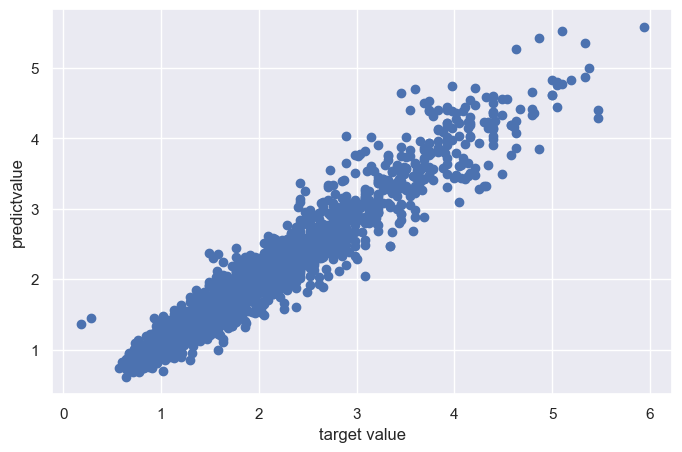

In [666]:
PrintPred(blended_pred)

In [667]:
# save model and test public data
#joblib.dump(model, './data/model/xgb_model.pkl')
#loaded_model = joblib.load('./data/model/xgb_model.pkl')
#public_dataset_pred = loaded_model.predict(public_dataset_df)
public_dataset_pred = blended_predictions(public_dataset_df)
mew_public_dataset_df = pd.read_csv('data/new_public_dataset.csv',encoding='utf-8-sig')
publict_submission_df = pd.DataFrame({'ID': mew_public_dataset_df['ID'], '單價': public_dataset_pred})
publict_submission_df.to_csv('./data/publict_blend_boxcox_mape9-29_date1111.csv', index=False)